<a href="https://colab.research.google.com/github/Murielbs/Titanic_Data_Analysis/blob/main/Titanic_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("train (1).csv")
scaler = StandardScaler()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#1.1 MEDIANA DA IDADE
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print (df['Age'].head())
#print (median_age)


28.0


In [ ]:
#1.2 MODA DA CABINE
mode_Cabin = df['Cabin'].mode()
df['Cabin'] = df['Cabin'].fillna(mode_Cabin)
print (df['Cabin'].head())
#print (mode_Cabin)


0    B96 B98
1         G6
Name: Cabin, dtype: object


In [ ]:
#1.3 MODA DO EMBARQUE
mode_embarked = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
print(df['Embarked'].head())
#print(mode_embarked)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


In [ ]:
#2 TRANSFORMANDO DADOS CATEGORICOS EM NUMEROS
le=LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Name'] = le.fit_transform(df['Name'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Sex'] = le.fit_transform(df['Sex'])
print(df.head())

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500    147         2  
1  71.2833     81         0  
2   7.9250    147         2  
3  53.1000     55         2  
4   8.0500    147         2  


In [ ]:
#3 ANALISE DESCRITIVA
numerical_cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nEstatísticas Descritivas:")
print(df[numerical_cols].describe().to_markdown(numalign='left', stralign='left'))


Estatísticas Descritivas:
|       | PassengerId   | Survived     | Pclass      | Name         | Sex         | Age       | SibSp       | Parch       | Ticket      | Fare        | Cabin        | Embarked     |
|:------|:--------------|:-------------|:------------|:-------------|:------------|:----------|:------------|:------------|:------------|:------------|:-------------|:-------------|
| count | 891           | 891          | 891         | 891          | 891         | 714       | 891         | 891         | 891         | 891         | 891          | 891          |
| mean  | 0             | -3.98733e-18 | 4.38607e-17 | -1.99367e-18 | 7.97467e-18 | 0         | 1.59493e-17 | 5.28322e-17 | 1.59493e-17 | 3.98733e-18 | -3.18987e-17 | -3.53876e-17 |
| std   | 1.00056       | 1.00056      | 1.00056     | 1.00056      | 1.00056     | 1.0007    | 1.00056     | 1.00056     | 1.00056     | 1.00056     | 1.00056      | 1.00056      |
| min   | -1.73011      | -0.789272    | -1.56611    | -1.73011

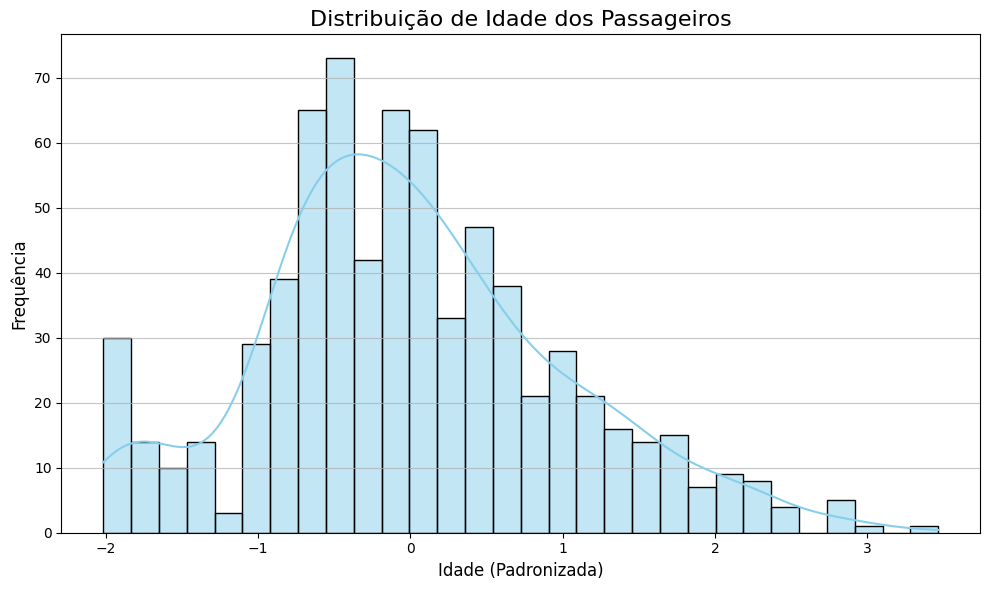

In [ ]:
#4.1 Histograma de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Idade dos Passageiros', fontsize=16)
plt.xlabel('Idade (Padronizada)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1790770521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


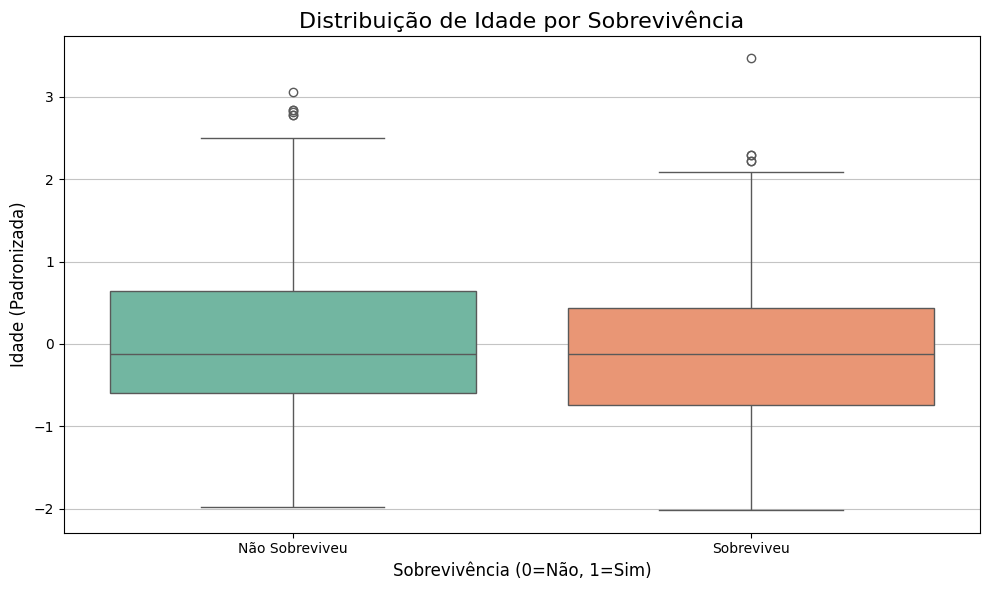

In [ ]:
#4.2 Gráfico de Caixas (Box Plot) de Idade por Sobrevivência
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Distribuição de Idade por Sobrevivência', fontsize=16)
plt.xlabel('Sobrevivência (0=Não, 1=Sim)', fontsize=12)
plt.ylabel('Idade (Padronizada)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

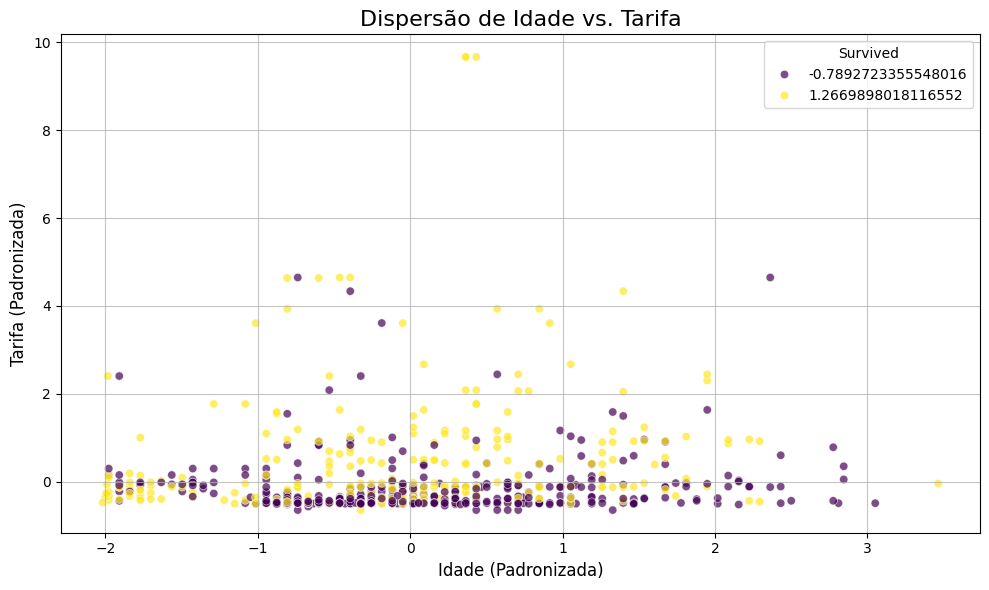

In [ ]:
#4.3 Gráfico de Dispersão (Scatter Plot) de Idade vs. Tarifa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='viridis', alpha=0.7)
plt.title('Dispersão de Idade vs. Tarifa', fontsize=16)
plt.xlabel('Idade (Padronizada)', fontsize=12)
plt.ylabel('Tarifa (Padronizada)', fontsize=12)
plt.grid(axis='both', alpha=0.75)
plt.tight_layout()
plt.show()

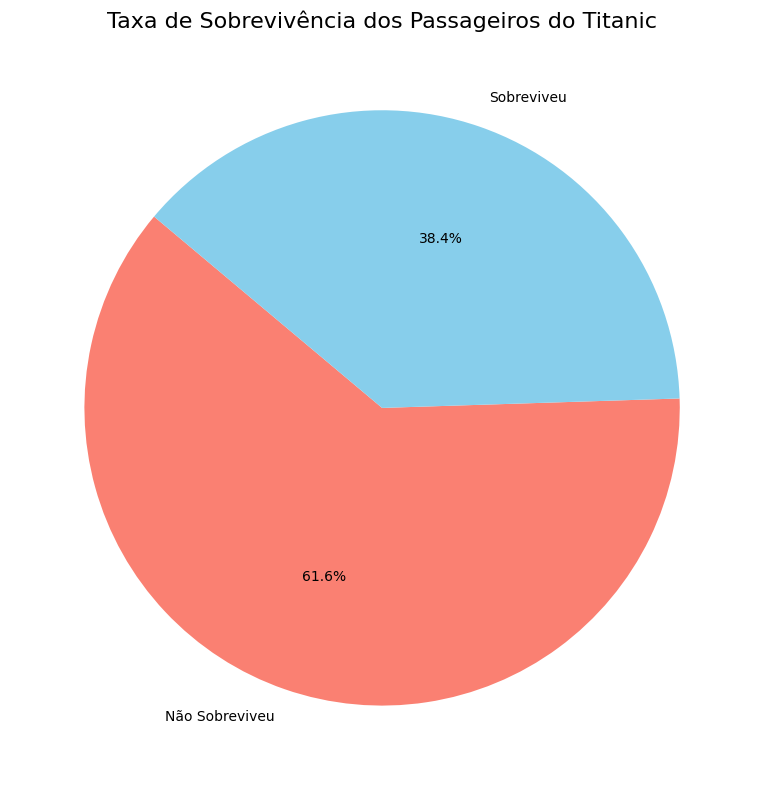

In [ ]:
#4.4 Gráfico de Pizza (Pie Chart) da Taxa de Sobrevivência
survival_counts = df['Survived'].value_counts()
labels = ['Não Sobreviveu', 'Sobreviveu']
colors = ['salmon', 'skyblue']
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Taxa de Sobrevivência dos Passageiros do Titanic', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3979290181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_freq.index, y=survival_freq.values, palette='coolwarm')


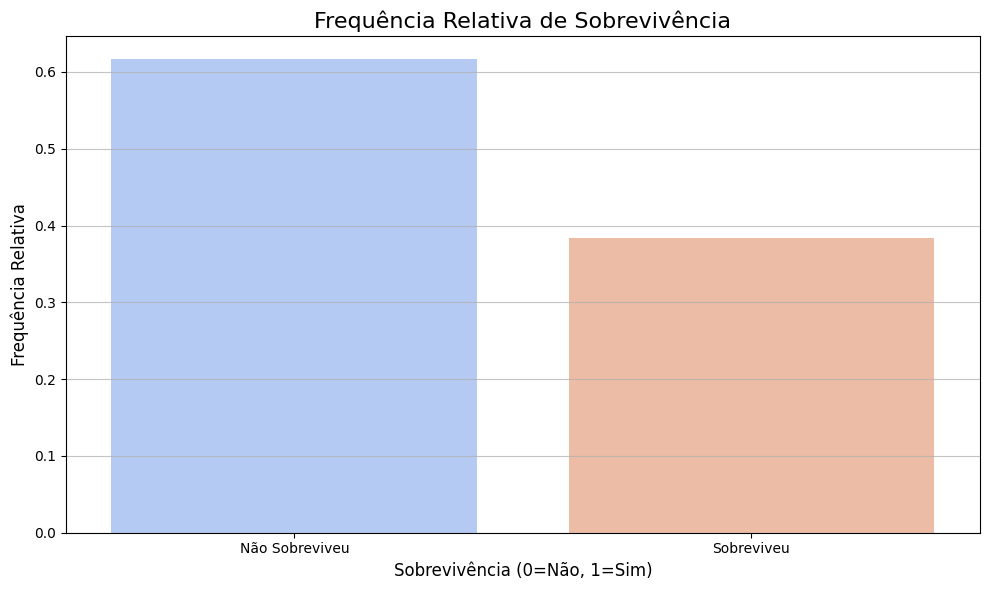

In [ ]:
#4.5 Gráfico de Frequência Relativa de Sobrevivência
survival_freq = df['Survived'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_freq.index, y=survival_freq.values, palette='coolwarm')
plt.title('Frequência Relativa de Sobrevivência', fontsize=16)
plt.xlabel('Sobrevivência (0=Não, 1=Sim)', fontsize=12)
plt.ylabel('Frequência Relativa', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()